**Prática de Segmentação de imagens**

In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

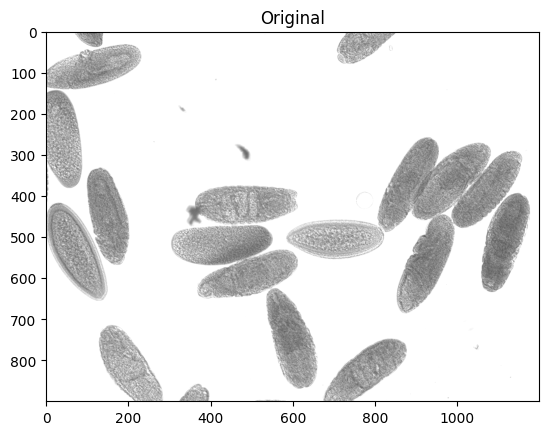

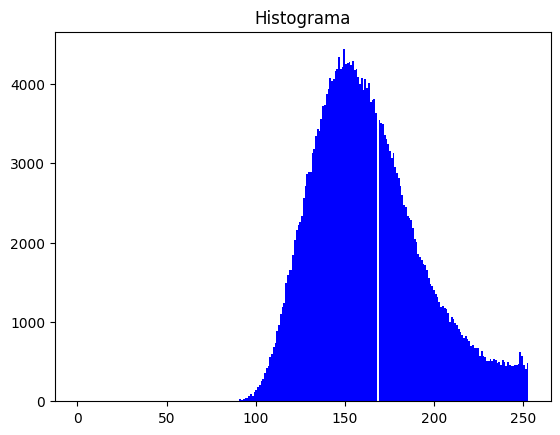

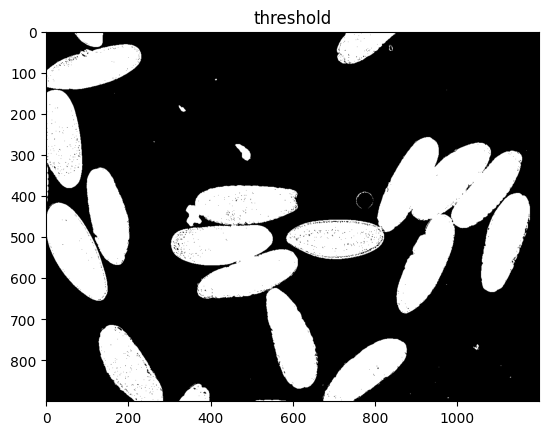

In [116]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.figure(2)
plt.title('Histograma')
plt.hist(img1.ravel(),256,[0,253], color = 'blue')

threshold = 240

img2 = 255 * (img1 <= threshold)
plt.figure(3)
plt.title('threshold')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

2) Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia
https://homepages.inf.ed.ac.uk/rbf/HIPR2/adpthrsh.htm

204.73979547385494
205.99631558118932


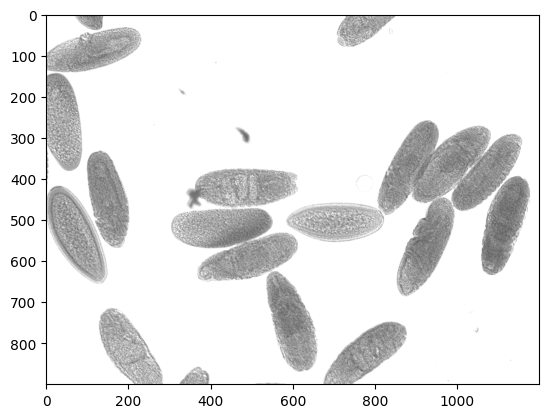

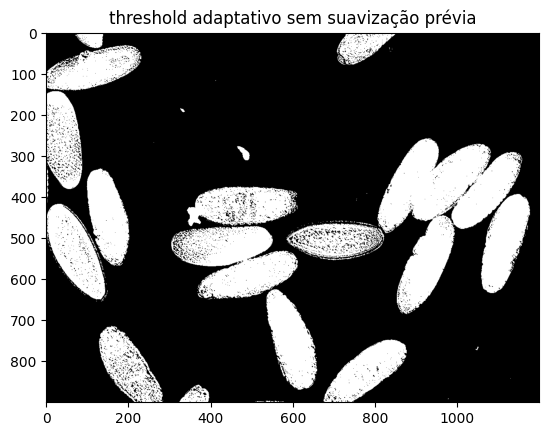

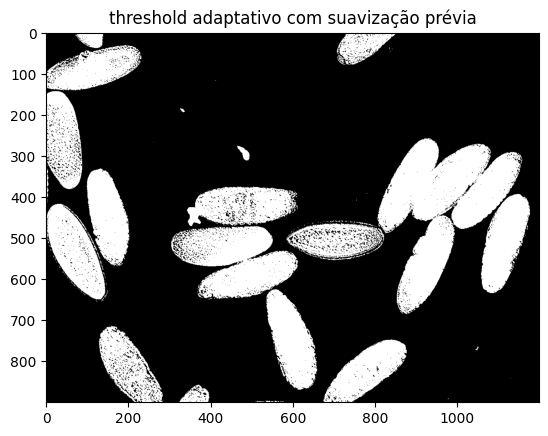

In [147]:
def threshold_variavel(img1):
    INF = float(1000000)

    #Valor de tolerancia
    EPS = 0.1

    histograma = cv2.calcHist([img1], [0], None, [256], [0, 256]).flatten()

    threshold = int((img1.min() + img1.max()) / 2.0)
    threshold_anterior = INF

    #Loop para calcular o threshold adaptativo
    while abs(threshold_anterior - threshold) > EPS:
        threshold_anterior = threshold
        threshold_rounded = int(threshold)

        # histograma dividido em 2 partes de acordo com o threshold definido acima
        histograma_inferior = histograma[:threshold_rounded+1]
        histograma_superior = histograma[threshold_rounded+1:]

        # Média ponderada da parte inferior do histograma
        # faz a soma da multiplicacao de cada valor do histograma pelo valor no histograma (hist_inferior[i])
        # e divide pela soma de todos os valores desta parte do histograma
        media_hist_inferior = sum(i * histograma_inferior[i] for i in range(threshold_rounded+1)) / sum(histograma_inferior)

        # Média ponderada da parte superior do histograma
        media_hist_superior = sum((i+threshold_rounded+1) * histograma_superior[i] for i in range(256-threshold_rounded-1)) / sum(histograma_superior)

        # Atualizando o valor do threshold
        threshold = (media_hist_inferior + media_hist_superior) / 2.0

    return threshold

img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE).astype('float32')

plt.figure(1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

threshold_sem_suavizacao = threshold_variavel(img1)
print(threshold_sem_suavizacao)

img_t_adaptativo = 255 * (img1 <= threshold_sem_suavizacao)

plt.figure(2)
plt.title('threshold adaptativo sem suavização prévia')
plt.imshow(img_t_adaptativo, cmap='gray', vmin=0, vmax=255)

img_suavizacao_gaus = cv2.GaussianBlur(img1, (5, 5), 0)
threshold_com_suavizacao = threshold_variavel(img_suavizacao_gaus)
print(threshold_com_suavizacao)

img_t_adaptativo_2 = 255 * (img1 <= threshold_com_suavizacao)

plt.figure(3)
plt.title('threshold adaptativo com suavização prévia')
plt.imshow(img_t_adaptativo_2, cmap='gray', vmin=0, vmax=255)

3. Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

228.95235185185183
1984.579216691015
204.0
228.95481666666666
1892.3551880960185
206.0


(array([804363.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

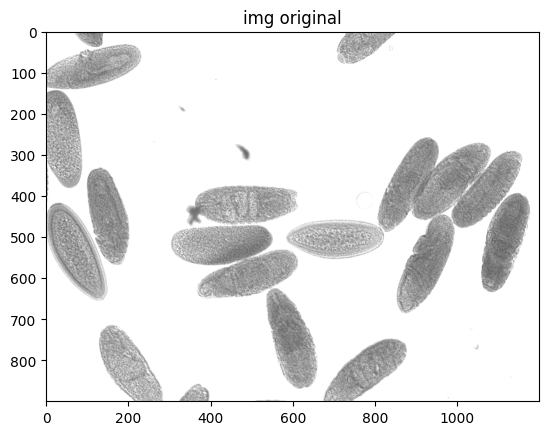

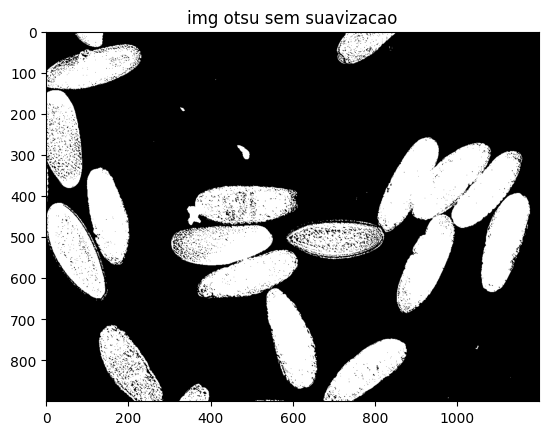

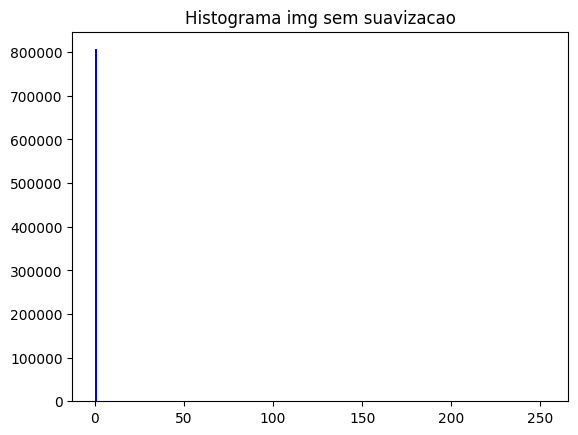

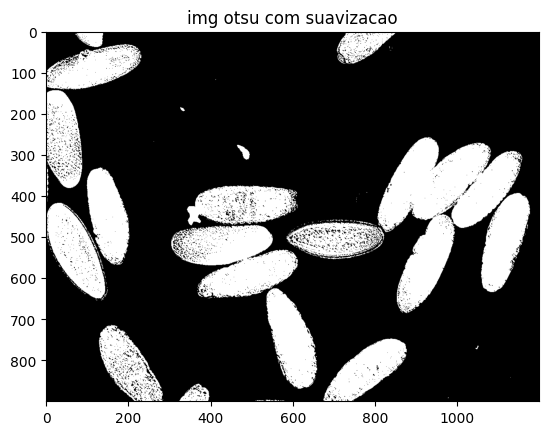

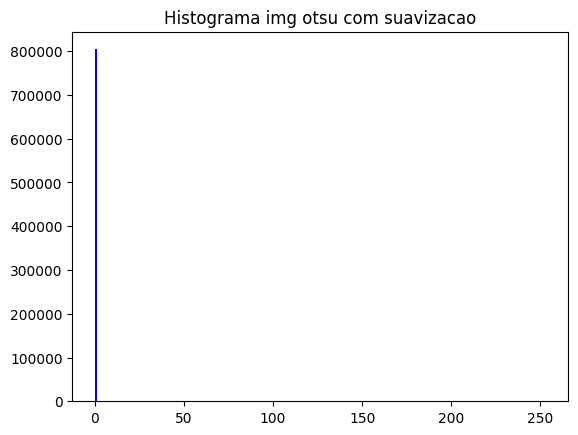

In [151]:
def segmentacao_otsu(img):
    #histograma da img
    histograma_img = np.histogram(img, bins=np.arange(257))[0]

    #Soma total dos pixels da img
    sum_histograma = np.sum(histograma_img)
    prob_val_intesidade = histograma_img / sum_histograma

    # distri acumulada
    distri_acumumulada = np.cumsum(prob_val_intesidade)

    media_acum = np.cumsum(prob_val_intesidade * np.arange(256))

    media_glob = media_acum[-1]
    print(media_glob)

    va = np.sum(prob_val_intesidade * (np.arange(256) - media_glob)**2)
    print(va)
    otsu = np.zeros(256)
    #itera sobre todos os valores de pixel da img
    for i in range(256):
        # se distri acumulada é maior que zero e menor que um
        if 0 < distri_acumumulada[i] < 1:
            # Calc do valor de otsu
            otsu[i] = ((media_glob * distri_acumumulada[i] - media_acum[i])**2) / (distri_acumumulada[i] * (1 - distri_acumumulada[i]))

    max_val = np.max(otsu)
    # Soma de todos os indices que possuem o valor máximo
    soma_indices = np.sum(np.where(otsu == max_val)[0])

    #qntdade de indices com o valor máximo
    qnt_max = np.sum(otsu == max_val)

    #threshold = média
    threshold = soma_indices / qnt_max

    print(threshold)
    # threshold
    return threshold

img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)


plt.figure(1)
plt.title('img original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)


threshold = segmentacao_otsu(img1)
img_otsu_sem_suavizacao = 255 * (img1 <= threshold)

plt.figure(2)
plt.title('img otsu sem suavizacao')
plt.imshow(img_otsu_sem_suavizacao, cmap='gray', vmin=0, vmax=255)

plt.figure(3)
plt.title('Histograma img sem suavizacao')
plt.hist(img_otsu_sem_suavizacao.ravel(), 256, [0, 253], color='blue')


#Com suavizacao

img_suavizacao_gaus = cv2.GaussianBlur(img1, (5, 5), 0)

threshold = segmentacao_otsu(img_suavizacao_gaus)
img_otsu_com_suavizacao = 255 * (img1 <= threshold)

plt.figure(4)
plt.title('img otsu com suavizacao')
plt.imshow(img_otsu_com_suavizacao, cmap='gray', vmin=0, vmax=255)

plt.figure(5)
plt.title('Histograma img otsu com suavizacao')
plt.hist(img_otsu_com_suavizacao.ravel(), 256, [0, 253], color='blue')


# Aplicar o histograma na img original

4) Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

178.0
128.0
112.0


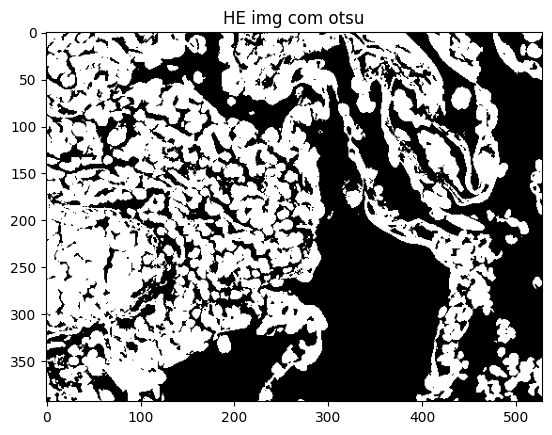

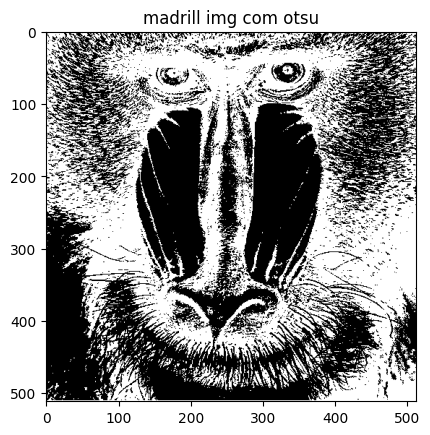

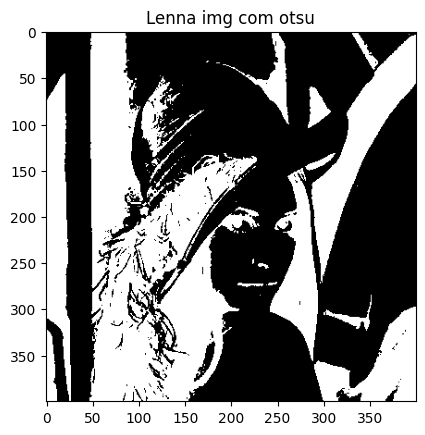

In [144]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)

threshold = segmentacao_otsu(img1)
img_otsu_he = 255 * (img1 <= threshold)

plt.figure(1)
plt.title('HE img com otsu')
plt.imshow(img_otsu_he, cmap='gray', vmin=0, vmax=255)


#####################


img2 = cv2.imread("madrill.tiff", cv2.IMREAD_GRAYSCALE)

threshold = segmentacao_otsu(img2)
img_otsu_madrill = 255 * (img2 <= threshold)

plt.figure(2)
plt.title('madrill img com otsu')
plt.imshow(img_otsu_madrill, cmap='gray', vmin=0, vmax=255)


#######################


img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)

threshold = segmentacao_otsu(img3)
img_otsu_lenna = 255 * (img3 <= threshold)

plt.figure(3)
plt.title('Lenna img com otsu')
plt.imshow(img_otsu_lenna, cmap='gray', vmin=0, vmax=255)